### Notes:

**This notebook describes the process of importing original dataset csv file converting it into delta table format -> then prep and train the model-> make prediction for daily games at first period --> then store the new observations into the orginial dataset**

In [0]:
# File location and type
file_location = "/FileStore/tables/game_stats.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0
0,8.0,9.0,1.0,0.0,2.0,3.0,5.0,4.0,1.0,7.0,5.0,7.0,8.0,3.0,1.0,2.0,11.0,7.0,0,1
0,4.0,8.0,0.0,1.0,5.0,5.0,12.0,5.0,3.0,4.0,2.0,2.0,3.0,3.0,1.0,3.0,5.0,12.0,1,0
1,8.0,4.0,1.0,0.0,5.0,5.0,5.0,12.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,12.0,5.0,0,1
0,5.0,19.0,0.0,1.0,2.0,4.0,9.0,6.0,3.0,3.0,4.0,5.0,2.0,6.0,5.0,3.0,7.0,11.0,1,0
1,19.0,5.0,1.0,0.0,4.0,2.0,6.0,9.0,3.0,3.0,5.0,4.0,6.0,2.0,3.0,5.0,11.0,7.0,0,1


In [0]:
# Create a view or table

temp_table_name = "`db`"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `db`

won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0
0,8.0,9.0,1.0,0.0,2.0,3.0,5.0,4.0,1.0,7.0,5.0,7.0,8.0,3.0,1.0,2.0,11.0,7.0,0,1
0,4.0,8.0,0.0,1.0,5.0,5.0,12.0,5.0,3.0,4.0,2.0,2.0,3.0,3.0,1.0,3.0,5.0,12.0,1,0
1,8.0,4.0,1.0,0.0,5.0,5.0,5.0,12.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,12.0,5.0,0,1
0,5.0,19.0,0.0,1.0,2.0,4.0,9.0,6.0,3.0,3.0,4.0,5.0,2.0,6.0,5.0,3.0,7.0,11.0,1,0
1,19.0,5.0,1.0,0.0,4.0,2.0,6.0,9.0,3.0,3.0,5.0,4.0,6.0,2.0,3.0,5.0,11.0,7.0,0,1


In [0]:
df= df.withColumnRenamed("Takeaways Against", "TakeawaysAgainst")
df= df.withColumnRenamed("#Won Faceoffs", "WonFaceoffs")
df= df.withColumnRenamed("#Lost Faceoffs", "LostFaceoffs")
df= df.withColumnRenamed("Shots Against", "ShotsAgainst")
df= df.withColumnRenamed("Goals Against", "GoalsAgainst")
df= df.withColumnRenamed("Hits gainst", "HitsAgainst")
df= df.withColumnRenamed("Giveaways_Against", "GivewaysAgainst")

df= df.withColumnRenamed("Missed Shots Against", "MissedShotsAgainst")
df= df.withColumnRenamed("Penalities Against", "PenalitiesAgainst")
df= df.withColumnRenamed("HOA away", "HOAaway")
df= df.withColumnRenamed("HOA home", "HOAhome")

In [0]:
df= df.withColumnRenamed("Blocked Shots", "BlockedShots")
df= df.withColumnRenamed("Blocked Shots Against", "BlockedShotsAgainst")
df= df.withColumnRenamed("Missed Shots", "MissedShots")
df= df.withColumnRenamed("Missed Shots_Against", "MissedShotsAgainst")


In [0]:
display(df)

won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,BlockedShots,BlockedShotsAgainst,Giveaways,GivewaysAgainst,MissedShots,MissedShotsAgainst,Penalities,Penalities_Against,WonFaceoffs,LostFaceoffs,HoA_away,HoA_home
0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0
0,8.0,9.0,1.0,0.0,2.0,3.0,5.0,4.0,1.0,7.0,5.0,7.0,8.0,3.0,1.0,2.0,11.0,7.0,0,1
0,4.0,8.0,0.0,1.0,5.0,5.0,12.0,5.0,3.0,4.0,2.0,2.0,3.0,3.0,1.0,3.0,5.0,12.0,1,0
1,8.0,4.0,1.0,0.0,5.0,5.0,5.0,12.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,12.0,5.0,0,1
0,5.0,19.0,0.0,1.0,2.0,4.0,9.0,6.0,3.0,3.0,4.0,5.0,2.0,6.0,5.0,3.0,7.0,11.0,1,0
1,19.0,5.0,1.0,0.0,4.0,2.0,6.0,9.0,3.0,3.0,5.0,4.0,6.0,2.0,3.0,5.0,11.0,7.0,0,1


### Create the delta lake table for storage

In [0]:

permanent_table_name = "`db`"

# create delta lake table to store dataset
#df.write.format("delta").saveAsTable(permanent_table_name)

In [1]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# API Packages
from datetime import date
import re
from datetime import datetime,timedelta
import requests
import json

# Data Drift Packaging
#from alibi_detect.cd import TabularDrift
#from alibi_detect.cd import ClassifierDrift
#import tensorflow as tf
#from tensorflow import keras

# Unit Test Packaging
import treon
import unittest
import pickle

# import warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    plot_confusion_matrix
)

In [0]:
# convert spark to pandas format
df1=df.toPandas()

In [2]:
# Importation of Revised Dataset from April 10th, 2022
url= "https://github.com/McGill-MMA-EnterpriseAnalytics/NHL-Game-II/blob/34a51e810606602cd544c13f759d04ffc06e9966/Period_1_Game_Stats_Final_ModelReady(April-10th-2022).csv?raw=true"

df = pd.read_csv(url)
df.head(5)

,won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
2,1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
3,0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
4,1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0


In [5]:
# split data into X and y
y = df.pop('won')
X = df

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [6]:
# Final Lightgbm.LGBMClassifier model
final_model = lgb.LGBMClassifier(learning_rate=0.04, max_depth=10, num_leaves = 31, random_state=42)
final_model.fit(X_train,y_train)
final_model.score(X_test, y_test)

0.6608801583675955

In [7]:
# Accuracy Scores
print('Training accuracy {:.4f}'.format(final_model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(final_model.score(X_test,y_test)))

Training accuracy 0.7156
Testing accuracy 0.6609


In [0]:
# Accuracy, Precision and Recall Scores
from sklearn.metrics import precision_score, recall_score
y_pred = final_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 66.09%
Precision score:  0.6652347345811599
Recall score:  0.6561743341404358


In [8]:
# Define some helpful functions
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Validation Result:

accuracy score: 0.6609



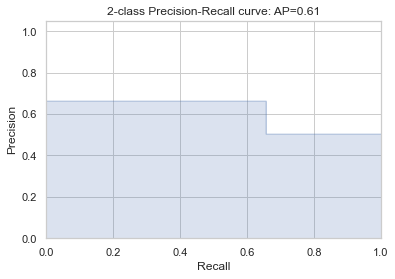

roc auc score: 0.6609097230003436



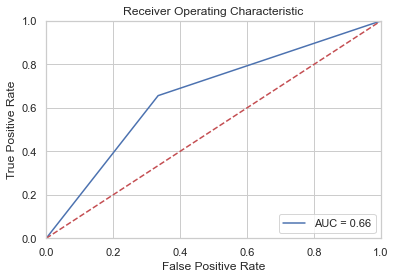

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      3263
           1       0.67      0.66      0.66      3304

    accuracy                           0.66      6567
   macro avg       0.66      0.66      0.66      6567
weighted avg       0.66      0.66      0.66      6567


Confusion Matrix: 
 [[2172 1091]
 [1136 2168]]

End of validation Result



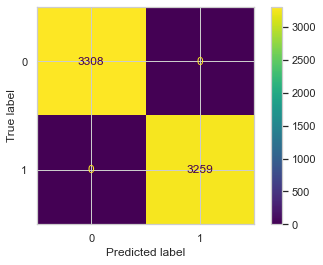

In [9]:
# classification report
clf_score(final_model, X_train, y_train, X_test, y_test, train=False)

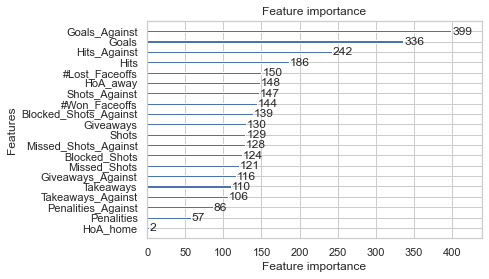

In [10]:
# plot feature importance
lgb.plot_importance(final_model)
plt.show()

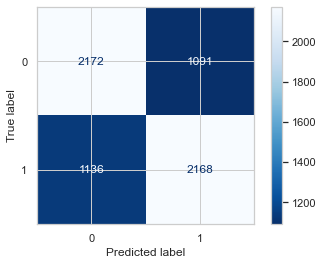

In [11]:
metrics.plot_confusion_matrix(final_model,X_test,y_test,cmap='Blues_r')


In [12]:
print(metrics.classification_report(y_test,final_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.66      0.67      0.66      3263
           1       0.67      0.66      0.66      3304

    accuracy                           0.66      6567
   macro avg       0.66      0.66      0.66      6567
weighted avg       0.66      0.66      0.66      6567



In [13]:
# Get todays date
today = date.today()

# dd/mm/YY
Day = today.strftime("%d")
Month = today.strftime("%m")
Year = today.strftime("%Y")
today = date.today()
print("Today's date:", today)

# Get API info
response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{Year}/{Month}/{Day}/schedule.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(Day=Day, Month = Month, Year = Year))

# Set response as json
x = response.json()

# Print API info
def getrs(obj):
    Todays_Schedule = []
    Todays_Schedule = pd.DataFrame([],columns = ["Game ID","Home Team",'Home Team ID',"Away Team","Away Team ID","Start Time"])
    q = len(obj["games"])
    for i in range(q):
            GID = obj["games"][i]["id"]
            H = obj['games'][i]['home']['name']
            Hid = obj['games'][i]['home']['id']
            A = obj['games'][i]['away']['name']
            Aid = obj['games'][i]['away']['id']
            PD = obj['games'][i]['scheduled']
            PD = re.search('T(.+?)Z',PD)
            if PD:
                found = PD.group(1)
            format = "%H:%M:%S"
            d = datetime.strptime(found,format) - timedelta(hours=4)
            d = d.strftime("%H:%M:%S")
            PD = d
            temp_df = [GID,H,Hid,A,Aid,PD]
            a_series = pd.Series(temp_df,index = Todays_Schedule.columns)
            Todays_Schedule = Todays_Schedule.append(a_series, ignore_index=True)
    return Todays_Schedule
data=getrs(x)
data.head(20)

Today's date: 2022-04-23


,Game ID,Home Team,Home Team ID,Away Team,Away Team ID,Start Time
0,619588fa-a652-415a-a544-fe219ad00aad,Buffalo Sabres,4416d559-0f24-11e2-8525-18a905767e44,New York Islanders,441766b9-0f24-11e2-8525-18a905767e44,12:30:00
1,887ac501-474d-4cd4-8169-c51acd5fb2f6,New Jersey Devils,44174b0c-0f24-11e2-8525-18a905767e44,Carolina Hurricanes,44182a9d-0f24-11e2-8525-18a905767e44,12:30:00
2,96e39404-ca28-4b95-9329-9ca35136432f,Detroit Red Wings,44169bb9-0f24-11e2-8525-18a905767e44,Pittsburgh Penguins,4417b7d7-0f24-11e2-8525-18a905767e44,12:30:00
3,574c876e-0539-4a5f-a93b-25422b209e7f,Boston Bruins,4416ba1a-0f24-11e2-8525-18a905767e44,New York Rangers,441781b9-0f24-11e2-8525-18a905767e44,15:00:00
4,002d9874-aa2f-4a25-b8b9-bfefac761d99,Tampa Bay Lightning,4417d3cb-0f24-11e2-8525-18a905767e44,Nashville Predators,441643b7-0f24-11e2-8525-18a905767e44,19:00:00
5,2cf75152-f469-4d5c-b076-c42f2d0b0f5b,Florida Panthers,4418464d-0f24-11e2-8525-18a905767e44,Toronto Maple Leafs,441730a9-0f24-11e2-8525-18a905767e44,19:00:00
6,40d28ba9-0c54-4d3d-af3f-c9315b8e725a,Ottawa Senators,4416f5e2-0f24-11e2-8525-18a905767e44,Montreal Canadiens,441713b7-0f24-11e2-8525-18a905767e44,19:00:00
7,2668a6c8-5cca-4057-984d-0ce1fecc024b,Dallas Stars,44157522-0f24-11e2-8525-18a905767e44,Seattle Kraken,1fb48e65-9688-4084-8868-02173525c3e1,20:00:00
8,461b0496-66e8-4062-bdbd-8d916e3c45b1,San Jose Sharks,44155909-0f24-11e2-8525-18a905767e44,Chicago Blackhawks,4416272f-0f24-11e2-8525-18a905767e44,20:00:00
9,00f44930-1d2b-4628-bc9a-663e88e028d9,Arizona Coyotes,44153da1-0f24-11e2-8525-18a905767e44,St. Louis Blues,441660ea-0f24-11e2-8525-18a905767e44,22:00:00


In [14]:
# Define function to generate stats from the first period of play
def Game_Home_Team_Stats(game_id,home_team_id,game_time):
    ts = 0
    tsa = 0
    go = 0
    goa = 0
    t = 0
    ta = 0
    h = 0
    ha = 0
    bs = 0
    bsa = 0
    gi = 0
    gia = 0
    ms = 0
    msa = 0
    p = 0
    pa = 0
    tfw = 0
    tfl = 0
    away = 0
    home = 0
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    if current_time < game_time:
        pass
    else:
        response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{obj}/pbp.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(obj = game_id))
        x = response.json()
        y = len(x['periods'][0]['events'])
        htc = x['home']['id']
        Team_Name = x['home']['name']
        Away_Name = x['away']['name']
        if htc == home_team_id:
            home = 1
        else:
            away = 1
        for i in range(y):
            j = x['periods'][0]['events'][i]['event_type']
            if j == 'faceoff':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        tfw = tfw + 1
                else:
                        tfl = tfl + 1
            elif j == 'goal':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        go = go + 1
                else:
                    goa = goa + 1
            elif j == 'penalty':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    p = p + 1
                else:
                    pa = pa + 1
            elif j == 'shotmissed' and 'blocked' in x['periods'][0]['events'][i]['description']:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        bs = bs + 1
                else:
                        bsa = bsa + 1
            elif j == 'shotmissed' and 'missed' in x['periods'][0]['events'][i]['description']:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        ms = ms + 1
                else:
                        msa = msa + 1
            elif j == 'giveaway':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    gi = gi + 1
                else:
                    gia = gia + 1
            elif j == 'hit':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    h = h + 1
                else:
                    ha = ha + 1
            elif j == 'takeaway':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    t = t + 1
                else:
                    ta = ta + 1
            elif 'shot' in j:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    ts = ts + 1
                else:
                    tsa = tsa + 1
            else:
                pass
            d = {"Team_Name":[Team_Name],"shots": [ts], "shots_against": [tsa],"goals":[go],"goals_against":[goa],"takeaways":[t],"takeaways_against":[ta],"hits":[h],"hits_against":[ha],"blockedShots":[bs],"blockedShots_against":[bsa],"giveaways":[gi],"giveaways_against":[gia],"missedShots":[ms],"missedShots_against":[msa],"penalties":[p],"penalties_against":[pa],"#Won Faceoffs":[tfw],"#Lost Faceoffs":[tfl],'HoA_away':[away],'HoA_home':[home]}
            da = {"Team_Name":[Away_Name],"shots": [tsa], "shots_against": [ts],"goals":[goa],"goals_against":[go],"takeaways":[ta],"takeaways_against":[t],"hits":[ha],"hits_against":[h],"blockedShots":[bsa],"blockedShots_against":[bs],"giveaways":[gia],"giveaways_against":[gi],"missedShots":[msa],"missedShots_against":[ms],"penalties":[pa],"penalties_against":[p],"#Won Faceoffs":[tfl],"#Lost Faceoffs":[tfw],'HoA_away':[home],'HoA_home':[away]}
            Home_Team_Stats = pd.DataFrame(d)
            Away_Team_Stats = pd.DataFrame(da)
            #series_obj = pd.Series(da)
            # Add a series as a row to the dataframe  
            All_Team_Stats = Home_Team_Stats.append(Away_Team_Stats,ignore_index=True)
        return All_Team_Stats
    
# Define function that takes tonights schedule (containing the nessecary Unique Id's) to gather the correct statistics from sportsradar
def get_game_stats(obj):
    c = ["Team_Name","shots", "shots_against","goals","goals_against","takeaways","takeaways_against","hits","hits_against","blockedShots","blockedShots_against","giveaways","giveaways_against","missedShots","missedShots_against","penalties","penalties_against","#Won Faceoffs","#Lost Faceoffs",'HoA_away','HoA_home']
    Tonights_games_stats = pd.DataFrame([],columns = c)
    r = len(obj['Game ID'])
    for i in range(r):
        game_id = obj['Game ID'][i]
        home_team_id = obj['Home Team ID'][i]
        game_start = obj['Start Time'][i]
        temp_df = Game_Home_Team_Stats(game_id,home_team_id,game_start)
        Tonights_games_stats = Tonights_games_stats.append(temp_df,ignore_index = True)
    return Tonights_games_stats

# Define function that inserts statistics for all of tonights teams into LGBMmodel
def tonights_bets(obj):
    m = len(obj)
    for i in range(m):
        Game_y_pred = final_model.predict(X_Game_test)
        prediction = [round(value) for value in Game_y_pred]
        print(prediction)
        probability = final_model.predict_proba(X_Game_test)
        print(probability)
tonights_data=get_game_stats(data)

# Generate Predictions from LGBMmodel
m = len(tonights_data)
y = tonights_data.pop('Team_Name')
for i in range(m):
    x_value = tonights_data.iloc[i]
    test = np.array([x_value])
    x_value = test.reshape(1, -1)
    Game_y_pred = final_model.predict(x_value)
    prediction = [round(value) for value in Game_y_pred]
    probability = final_model.predict_proba(x_value)
    if prediction[0] != 1:
        print("The "+y[i]+" are projected to lose.")
        print("Current odds are "+str(round((probability[0][0])*100,2))+"%"+" to lose and only "+str(round((probability[0][1])*100,2))+"%"+" to win."+'\n')
    else:
        print("The "+y[i]+" are projected to win.")
        print("Current odds are "+str(round((probability[0][1])*100,2))+"%"+" to win and "+str(round((probability[0][0])*100,2))+"%"+ " to lose."+'\n')


# When modeling both the home team and away team, there seems to be, on average a %4 difference between
# the home team and away teams respective odds. I believe this is due to LGBMmodel but because the difference
# is minor, I don't think its a problem for us. 

The Sabres are projected to win.
Current odds are 55.38% to win and 44.62% to lose.

The Islanders are projected to lose.
Current odds are 54.02% to lose and only 45.98% to win.

The Devils are projected to win.
Current odds are 52.07% to win and 47.93% to lose.

The Hurricanes are projected to win.
Current odds are 52.52% to win and 47.48% to lose.

The Red Wings are projected to lose.
Current odds are 68.49% to lose and only 31.51% to win.

The Penguins are projected to win.
Current odds are 68.49% to win and 31.51% to lose.

The Bruins are projected to win.
Current odds are 70.07% to win and 29.93% to lose.

The Rangers are projected to lose.
Current odds are 73.29% to lose and only 26.71% to win.



In [25]:
### store new daily games observations into database 
tonights_data.shape

(8, 20)

In [26]:

tonights_data.head()


,shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blockedShots,blockedShots_against,giveaways,giveaways_against,missedShots,missedShots_against,penalties,penalties_against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,11,5,1,1,2,2,0,5,3,5,4,2,6,3,1,3,9,12,0,1
1,5,11,1,1,2,2,5,0,5,3,2,4,3,6,3,1,12,9,1,0
2,6,9,0,0,2,3,6,6,5,5,2,1,0,5,0,1,8,12,0,1
3,9,6,0,0,3,2,6,6,5,5,1,2,5,0,1,0,12,8,1,0
4,8,5,1,2,7,1,9,4,2,3,1,2,2,7,0,1,7,15,0,1


In [27]:
# get the prediction results in the first period
z= tonights_data.to_numpy()

prediction = final_model.predict(z)
stats = pd.DataFrame(prediction, columns = ['won'])
stats.shape

(8, 1)

In [28]:
# concat the dataframes and store into data storage

game_observtions= pd.concat([tonights_data,stats],axis=1)


In [29]:
game_observtions.head()

,shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blockedShots,blockedShots_against,giveaways,giveaways_against,missedShots,missedShots_against,penalties,penalties_against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home,won
0,11,5,1,1,2,2,0,5,3,5,4,2,6,3,1,3,9,12,0,1,1
1,5,11,1,1,2,2,5,0,5,3,2,4,3,6,3,1,12,9,1,0,0
2,6,9,0,0,2,3,6,6,5,5,2,1,0,5,0,1,8,12,0,1,1
3,9,6,0,0,3,2,6,6,5,5,1,2,5,0,1,0,12,8,1,0,1
4,8,5,1,2,7,1,9,4,2,3,1,2,2,7,0,1,7,15,0,1,0


In [31]:
game_observtions.columns

Index(['shots', 'shots_against', 'goals', 'goals_against', 'takeaways',
       'takeaways_against', 'hits', 'hits_against', 'blockedShots',
       'blockedShots_against', 'giveaways', 'giveaways_against', 'missedShots',
       'missedShots_against', 'penalties', 'penalties_against',
       '#Won Faceoffs', '#Lost Faceoffs', 'HoA_away', 'HoA_home', 'won'],
      dtype='object')

In [42]:
# reorganize the columnns for insertions into delta table
game_observtions= game_observtions[['won','shots','shots_against','goals','goals_against','takeaways','takeaways_against','hits','hits_against','blockedShots','blockedShots_against','giveaways',
                                    'giveaways_against','missedShots','missedShots_against','penalties','penalties_against','#Won Faceoffs','#Lost Faceoffs','HoA_away':'HoA_away''HoA_home']]

In [49]:
# columns name updated to mainatain traceability and consistency with the existing delta table 

game_observtions.rename(
    columns={'won':'won','shots':'Shots','shots_against':'Shots_Against','goals':'Goals','goals_against':'Goals_Against',
             'takeaways':'Takeaways','takeaways_Against':'Takeaways_Against','hits':'Hits','hits_against':'Hits_Against',
             'blockedShots':'BlockedShots','blockedShots_against':'BlockedShots_Against',
             'giveaways_against':'Giveaways_Against','missedShots':'MissedShots','missedShots_against':'MissedShots_Against',
             'penalties':'Penalties','penalties_against':'Penalties_Against', 
             '#Won Faceoffs':'#Won Faceoffs','#Lost Faceoffs':'#Lost Faceoffs','HoA_away':'HoA_away',
             'HoA_home':'HoA_home'}
          ,inplace=True)

In [50]:
game_observtions

,won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,takeaways_against,Hits,Hits_Against,BlockedShots,BlockedShots_Against,giveaways,Giveaways_Against,MissedShots,MissedShots_Against,Penalties,Penalties_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,1,11,5,1,1,2,2,0,5,3,5,4,2,6,3,1,3,9,12,0,1
1,0,5,11,1,1,2,2,5,0,5,3,2,4,3,6,3,1,12,9,1,0
2,1,6,9,0,0,2,3,6,6,5,5,2,1,0,5,0,1,8,12,0,1
3,1,9,6,0,0,3,2,6,6,5,5,1,2,5,0,1,0,12,8,1,0
4,0,8,5,1,2,7,1,9,4,2,3,1,2,2,7,0,1,7,15,0,1
5,1,5,8,2,1,1,7,4,9,3,2,2,1,7,2,1,0,15,7,1,0
6,1,9,12,1,0,2,3,7,11,9,5,5,2,4,1,1,2,10,4,0,1
7,0,12,9,0,1,3,2,11,7,5,9,2,5,1,4,2,1,4,10,1,0


#### New Observations Stored into Delta Lake

In [0]:

%fs ls dbfs:/user/hive/warehouse

In [0]:
game_observtions_spark= spark.createDataFrame(extest)

display(game_observtions_spark)

In [0]:
#DeltaTable.isDeltaTable(spark, "/user/hive/warehouse/db/")


In [0]:
# load the delta table
tableload = spark.read.format("delta").load("/user/hive/warehouse/db/")
display(tableload)

In [0]:
tableload.count()

In [0]:
display(game_observtions_spark)

In [0]:
# tonights game observations appended to original dataset

game_observtions_spark.write.format("delta").mode("append").saveAsTable("/user/hive/warehouse/db/")
